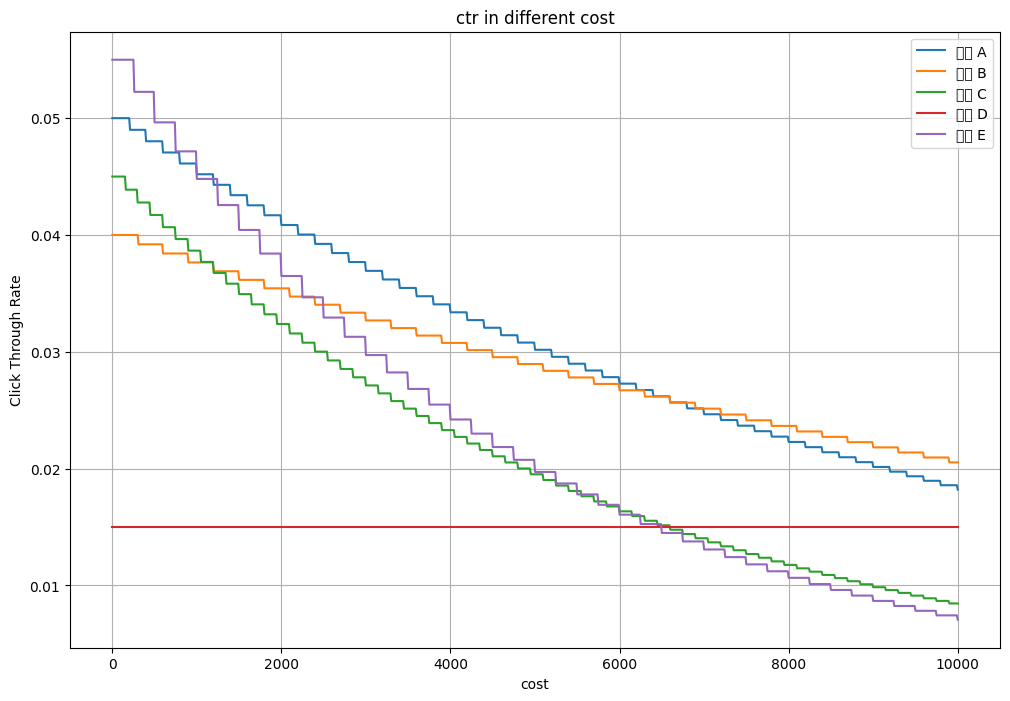

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 定義廣告平台及其成本和點擊率下降規則
platforms = [
    {"name": "A", "base_ctr": 0.05, "decline": (200, 0.02)},
    {"name": "B", "base_ctr": 0.04, "decline": (300, 0.02)},
    {"name": "C", "base_ctr": 0.045, "decline": (150, 0.025)},
    {"name": "D", "base_ctr": 0.015, "decline": (float('inf'), 0.0)},  # 無下降
    {"name": "E", "base_ctr": 0.055, "decline": (250, 0.05)}
]

def calculate_ctr(platform, investment):
    base_ctr = platform["base_ctr"]
    decline_interval, decline_rate = platform["decline"]
    
    if investment <= decline_interval:
        return base_ctr
    
    intervals = investment // decline_interval
    declined_ctr = base_ctr * ((1 - decline_rate) ** intervals)
    return declined_ctr

# 計算不同投資下的點擊率
investments = np.arange(0, 10001, 10)
ctr_values = {platform["name"]: [calculate_ctr(platform, invest) for invest in investments] for platform in platforms}

# 繪製圖表
plt.figure(figsize=(12, 8))
for platform in platforms:
    plt.plot(investments, ctr_values[platform["name"]], label=f"平台 {platform['name']}")

plt.xlabel('cost')
plt.ylabel('Click Through Rate')
plt.title('ctr in different cost')
plt.legend()
plt.grid(True)
plt.show()